In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Question 1 - how much water does reservoir contain?


In [2]:
file_path = '/Volumes/Seagate Backup Plus Drive/connected_worlds/2017-09-19/'
file_names = [
    '10-01-14-Free_Play/log-0-Free_Play_Session.csv',
    '10-30-06-Free_Play_Easy/log-0-Easy_Session.csv',
    '10-42-52-ESSIL_groundtruth/log-0-Main.csv',
    '11-01-47-Free_Play_Easy/log-0-Easy_Session.csv',
    '11-33-19-Free_Play_Super_Easy/log-0-Free_Play_Session.csv',
    '12-48-25-Free_Play_Super_Easy/log-0-Free_Play_Session.csv',
    '14-49-03-ESSIL_groundtruth/log-0-Main.csv',
    '14-53-13-ESSIL_groundtruth/log-0-Main.csv',
    '15-06-15-ESSIL_groundtruth/log-0-Main.csv',
    '15-16-53-ESSIL_groundtruth/log-0-Main.csv',
    '15-20-23-Free_Play_Easy/log-0-Easy_Session.csv',
    '16-09-25-Free_Play_Easy/log-0-Easy_Session.csv',
]

In [3]:
pds = [pd.read_csv(file_path + f) for f in file_names]

dfs = []
for df in pds:
    df.columns = df.columns.str.strip()
    dfs.append(df.ix[1:])

In [4]:
for f,df in zip(file_names,dfs):
    max_water = df.Total_Water.max()
    max_water_in_reservoir = df.Reservoir_Water.max()
    print('f_name = {}'.format(f))
    print('n_rows = {}, For Total_Water = {}, Reservoir Contains a Max of: {}'.format(df.shape[0], max_water, max_water_in_reservoir))
    print()

f_name = 10-01-14-Free_Play/log-0-Free_Play_Session.csv
n_rows = 1427, For Total_Water = 2.5, Reservoir Contains a Max of: 0.54673

f_name = 10-30-06-Free_Play_Easy/log-0-Easy_Session.csv
n_rows = 632, For Total_Water = 4, Reservoir Contains a Max of: 0.6032420000000001

f_name = 10-42-52-ESSIL_groundtruth/log-0-Main.csv
n_rows = 752, For Total_Water = 4, Reservoir Contains a Max of: 0.546733

f_name = 11-01-47-Free_Play_Easy/log-0-Easy_Session.csv
n_rows = 741, For Total_Water = 4, Reservoir Contains a Max of: 0.48756000000000005

f_name = 11-33-19-Free_Play_Super_Easy/log-0-Free_Play_Session.csv
n_rows = 748, For Total_Water = 6, Reservoir Contains a Max of: 0.627404

f_name = 12-48-25-Free_Play_Super_Easy/log-0-Free_Play_Session.csv
n_rows = 731, For Total_Water = 6, Reservoir Contains a Max of: 0.5714199999999999

f_name = 14-49-03-ESSIL_groundtruth/log-0-Main.csv
n_rows = 204, For Total_Water = 4, Reservoir Contains a Max of: 0.45

f_name = 14-53-13-ESSIL_groundtruth/log-0-Main.cs

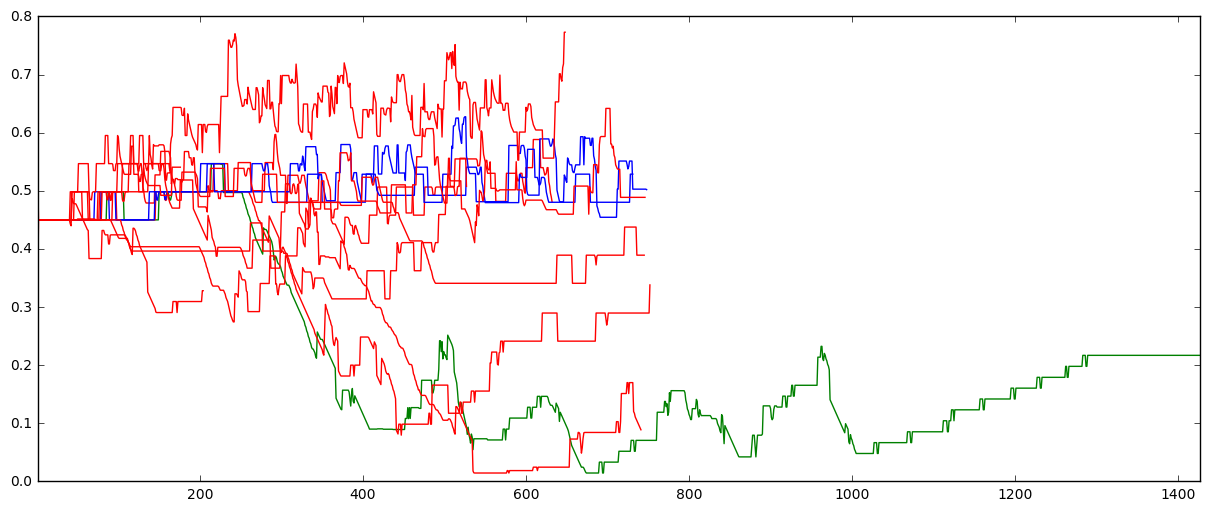

In [5]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

c = {
    4: 'r',
    2.5: 'g',
    6: 'b'
}

for f,df in zip(file_names,dfs):
    max_water = df.Total_Water.max()
    df.Reservoir_Water.plot(ax=ax, c=c[max_water], label=f)
    
# plt.legend()

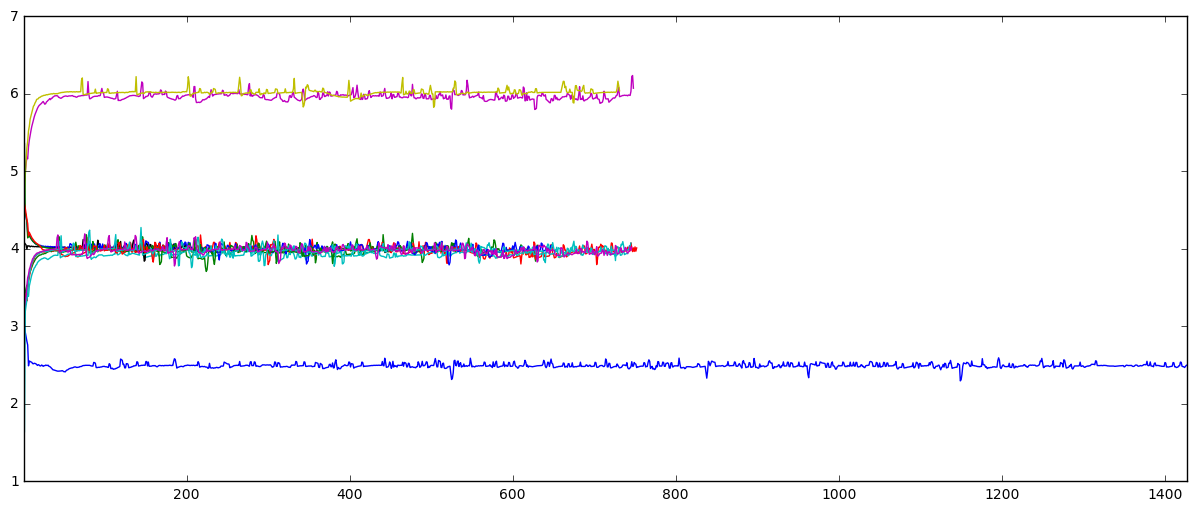

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for df in dfs:
    
    df[df.columns[df.columns.str.contains('_Water') & ~df.columns.str.contains('Total')]].sum(axis=1).plot(ax=ax)

In [7]:
df.columns[df.columns.str.contains('_Water')]

Index(['Total_Water', 'Desert_Water', 'MountainValley_Water', 'Plains_Water',
       'Waterfall_Water', 'Floor_Water', 'Jungle_Water', 'Reservoir_Water',
       'Wetlands_Water', 'Desert_WaterBins', 'MountainValley_WaterBins',
       'Plains_WaterBins', 'Jungle_WaterBins', 'Reservoir_WaterBins',
       'Wetlands_WaterBins'],
      dtype='object')

Notes:
 - The water level itself is noisy but it is not a disaster.
 - The amount of water that the reservoir can hold is constant. This means it has a much greater effect on the lower water games than on the higher water games.
 - The water in the clouds is not logged.

# Question 2 - How much water is used by the automatic expulsion of the plug slug?

A - as much as it rains, this can be as much as 0.05.

# Question 3 - How much water does the water dropper move:

0.018759899999999996


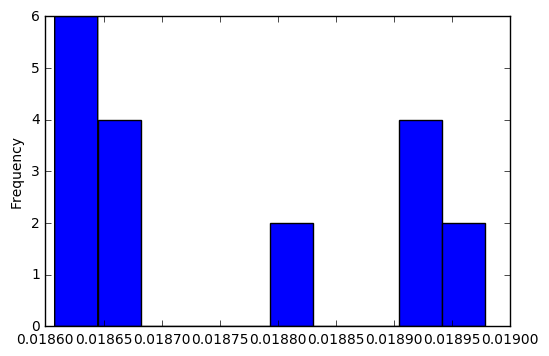

In [8]:
diff = dfs[0].Reservoir_Water.ix[1000:].diff()
diff[diff > 0].plot(kind='hist')
print(diff[diff > 0].mean())

A approximately 0.0187

### What about the water in the reservoir - given all of the data:

In [19]:
water_level = []
max_reservoir_level = []

path = '/Volumes/Seagate Backup Plus Drive/connected_worlds'
for f1 in os.listdir(path):
    
    if not os.path.isdir(os.path.join(path, f1)):
        continue
        
    path2 = os.path.join(path, f1)
    for f2 in os.listdir(path2):
            
        if not os.path.isdir(os.path.join(path2, f2)):
            continue
        
        path3 = os.path.join(path2, f2)
        for f3 in os.listdir(path3):
            
            if not '.csv' in f3:
                continue
                
            df = pd.read_csv(os.path.join(path3, f3))
            
            if df.shape[0] < 500:
                continue
            df.columns = df.columns.str.strip()
            water = df.Total_Water.mean()
            max_water_in_reservoir = df.Reservoir_Water.max()
            
            water_level.append(water)
            max_reservoir_level.append(max_water_in_reservoir)

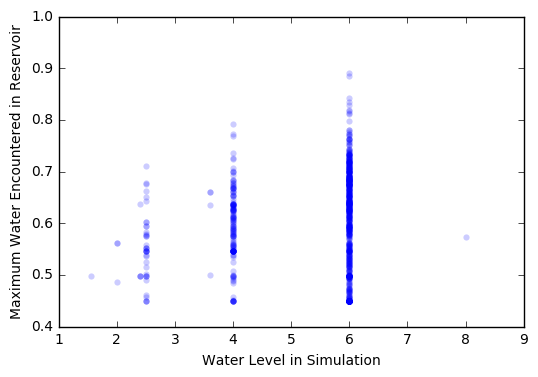

In [20]:
plt.scatter(water_level, max_reservoir_level, alpha=0.2, lw=0)
plt.xlabel('Water Level in Simulation')
plt.ylabel('Maximum Water Encountered in Reservoir')
plt.show()